In [11]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib.colors
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
## Evaluating p-distribution for p-value computation
num_samples_estimation=100000
sig_to_noise_rate=[j*0.1 for j in range(21)] #0, 0.1 ,...,0.9, 1,...2
sig_to_noise_rate[0]=0.0001
num_points=[k*10 for k in range(1,16)]#10,20,30,...150

In [6]:
# Import data
try:
    MI_FDR
    Pear_FDR
except NameError:
    MI_FDR=json.load(open('FDR_MI.txt','r'))
    Pear_FDR=json.load(open('FDR_pear.txt','r'))

In [ ]:
mean_M_FDR = np.zeros((len(MI_FDR),len(MI_FDR[0])))  #Sig/noise  #Nb points
std_M_FDR  = np.zeros((mean_M_FDR.shape))
mean_P_FDR = np.zeros((mean_M_FDR.shape))
std_P_FDR  = np.zeros((mean_M_FDR.shape))

for i in range(mean_M_FDR.shape[0]):
    for j in range(mean_M_FDR.shape[1]):
        mean_M_FDR[i,j] = np.mean(MI_FDR[i][j])
        std_M_FDR[i,j]  = np.std(MI_FDR[i][j])
        mean_P_FDR[i,j] = np.mean(Pear_FDR[i][j])
        std_M_FDR[i,j]  = np.std(Pear_FDR[i][j])

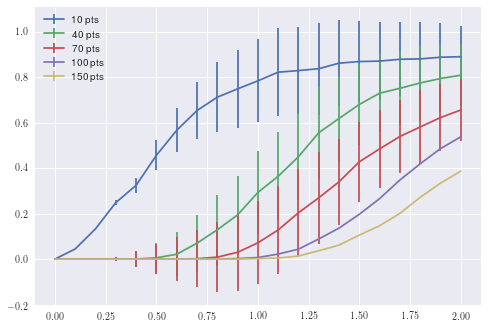

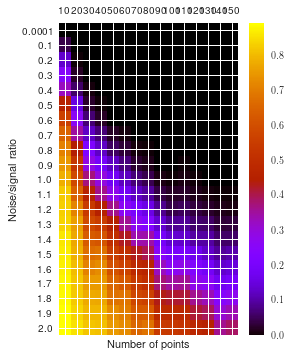

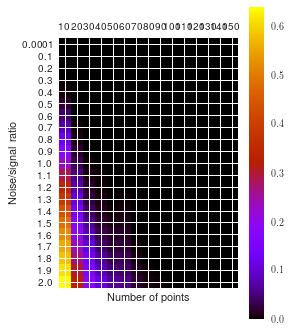

In [35]:
plt.errorbar(sig_to_noise_rate,mean_M_FDR[:,0],yerr=std_M_FDR[:,0],label='10 pts')
plt.errorbar(sig_to_noise_rate,mean_M_FDR[:,3],yerr=std_M_FDR[:,0],label='40 pts')
plt.errorbar(sig_to_noise_rate,mean_M_FDR[:,6],yerr=std_M_FDR[:,0],label='70 pts')
plt.errorbar(sig_to_noise_rate,mean_M_FDR[:,9],yerr=std_M_FDR[:,9],label='100 pts')
plt.errorbar(sig_to_noise_rate,mean_M_FDR[:,14],yerr=std_M_FDR[:,14],label='150 pts')
plt.legend()
plt.show()
plt.clf()

plt.matshow(mean_M_FDR,cmap=plt.get_cmap('gnuplot'),aspect='auto')
plt.xticks(range(len(num_points)),num_points)
plt.yticks(range(len(sig_to_noise_rate)),sig_to_noise_rate)
plt.xlabel('Number of points')
plt.ylabel('Noise/signal ratio')
plt.colorbar()
plt.show()

plt.matshow(mean_P_FDR,cmap=plt.get_cmap('gnuplot'))
plt.xticks(range(len(num_points)),num_points)
plt.yticks(range(len(sig_to_noise_rate)),sig_to_noise_rate)
plt.xlabel('Number of points')
plt.ylabel('Noise/signal ratio')
plt.colorbar()
plt.show()

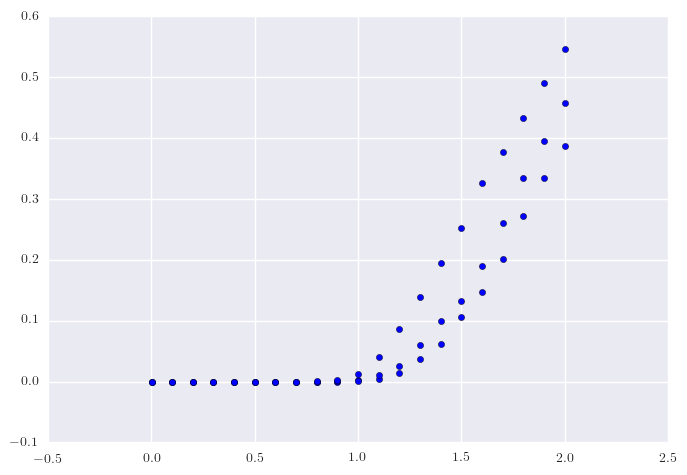

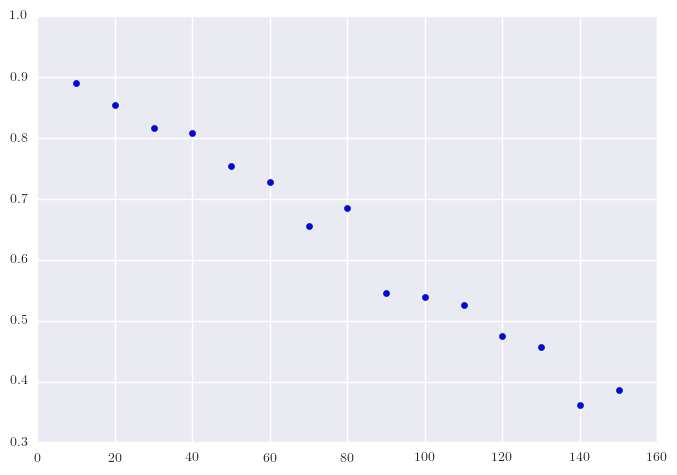

In [23]:
plt.scatter(sig_to_noise_rate, mean_M_FDR[:,-1])
plt.scatter(sig_to_noise_rate, mean_M_FDR[:,-3])
plt.scatter(sig_to_noise_rate, mean_M_FDR[:,-7])
plt.show()

plt.scatter(num_points, mean_M_FDR[-1,:])
plt.show()